## Desafio 2 - I2A2

##### Estudante: Thiago Piovesan
---
### # Objetivo:
→ Entregar um Jupyter Notebook com o trabalho até o modelo chegar ao ponto de ter os datasets de treino e teste analisados e preparados para as inferências.

→ O dataset, nada mais é que referente aos passageiros do Titanic, e a variável alvo é se ele sobreviveu ou não.
→ Este desafio está também no Kaggle. O link é: [https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

→ Pensando no CRISP-DS, desenvolver a análise do problema de negócios, a compreensão sobre os dados (extração dos dados, limpeza) e a preparação (análise exploratória).

---

### # Importação das Bibliotecas:

### Importação das Bibliotecas:

In [395]:
# https://pandas.pydata.org/docs/
import pandas as pd

# https://numpy.org/
import numpy as np

# https://matplotlib.org/
# https://seaborn.pydata.org/
import matplotlib.pyplot as plt
import seaborn as sns

# https://imbalanced-learn.org/stable/
#%pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# https://scikit-learn.org/
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, \
                            accuracy_score, precision_score, recall_score, \
                            f1_score, confusion_matrix



## # First Stage -> Data importation and first analysis:

### Training Dataset:

In [396]:
# Loading the dataset - Train.csv
df_tr = pd.read_csv('Train.csv')
df_tr.head()

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


In [397]:
# Making it more beautifull and organized --> Colocando a coluna survived no final:

cols = list(df_tr.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('survived')) #Remove b from list
df_tr = df_tr[cols+['survived']] #Create new dataframe with columns in the order you want

df_tr.head()


,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq,survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619,0


### Testing Dataset:

In [398]:
# Loading the dataset - Train.csv
df_tt = pd.read_csv('Test.csv')
df_tt.head()

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN,925.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,NaN,NaN,NaN,1291.0
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,NaN,NaN,"Cambridge, MA",512.0
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,NaN,131.0,NaN,1297.0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,15,NaN,NaN,868.0


---


### Datasets shape and dropouts

In [399]:
# Checking the rows and columns of each dataset:
print("Shape of train: ", df_tr.shape)
print("Shape of test: ", df_tt.shape)


Shape of train:  (891, 16)
Shape of test:  (419, 15)


In [400]:
# Removing duplicates 
df_tr.drop_duplicates(keep='first', inplace=True)      # inplace = true -> usa o mesmo objeto que ta na memória
df_tt.drop_duplicates(keep='first', inplace=True)      # inplace = true -> usa o mesmo objeto que ta na memória

print("Shape of train: ", df_tr.shape)
print("Shape of test: ", df_tt.shape)

Shape of train:  (891, 16)
Shape of test:  (419, 15)


---

### Checking infos about the Train dataset:

In [401]:
# Checking the dataset of Train:

df_tr.describe()

,Kaggle_Pass_Id,pclass,age,sibsp,parch,fare,body,orig_seq,survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,83.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699113,0.523008,0.381594,32.204208,162.843373,662.304153,0.383838
std,257.353842,0.836071,14.526507,1.102743,0.806057,49.693429,96.945356,378.282967,0.486592
min,1.000000,1.000000,0.416700,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,73.500000,335.500000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,169.000000,666.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,252.000000,993.500000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1309.000000,1.000000


In [402]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   name            891 non-null    object 
 3   sex             891 non-null    object 
 4   age             714 non-null    float64
 5   sibsp           891 non-null    int64  
 6   parch           891 non-null    int64  
 7   ticket          891 non-null    object 
 8   fare            891 non-null    float64
 9   cabin           204 non-null    object 
 10  embarked        889 non-null    object 
 11  boat            330 non-null    object 
 12  body            83 non-null     float64
 13  home.dest       499 non-null    object 
 14  orig_seq        891 non-null    int64  
 15  survived        891 non-null    int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 118.3+ KB


In [403]:
# Checking if exists null values
df_tr.isnull().sum()

Kaggle_Pass_Id      0
pclass              0
name                0
sex                 0
age               177
sibsp               0
parch               0
ticket              0
fare                0
cabin             687
embarked            2
boat              561
body              808
home.dest         392
orig_seq            0
survived            0
dtype: int64

In [404]:
# Colocando em porcentagem para facilitar:

total = df_tr.isnull().sum()#sort_values(ascending=False)
aux = df_tr.isnull().sum()/df_tr.isnull().count()*100
percent = (round(aux, 1))#.sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head(16)

,Total,%
Kaggle_Pass_Id,0,0.0
pclass,0,0.0
name,0,0.0
sex,0,0.0
age,177,19.9
sibsp,0,0.0
parch,0,0.0
ticket,0,0.0
fare,0,0.0
cabin,687,77.1


---

### Checking infos about the Test dataset:

In [405]:
# Checking the dataset of Train:

df_tt.describe()

,Kaggle_Pass_Id,pclass,age,sibsp,parch,fare,body,orig_seq
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,38.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,156.368421,639.430622
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,100.485422,377.439393
min,892.000000,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000,4.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,72.500000,316.500000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,134.000000,633.500000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,260.750000,961.250000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,307.000000,1308.000000


In [406]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 418
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  418 non-null    float64
 1   pclass          418 non-null    float64
 2   name            418 non-null    object 
 3   sex             418 non-null    object 
 4   age             332 non-null    float64
 5   sibsp           418 non-null    float64
 6   parch           418 non-null    float64
 7   ticket          418 non-null    object 
 8   fare            417 non-null    float64
 9   cabin           91 non-null     object 
 10  embarked        418 non-null    object 
 11  boat            156 non-null    object 
 12  body            38 non-null     float64
 13  home.dest       246 non-null    object 
 14  orig_seq        418 non-null    float64
dtypes: float64(8), object(7)
memory usage: 52.4+ KB


In [407]:
# Checking if exists null values
df_tt.isnull().sum()

Kaggle_Pass_Id      1
pclass              1
name                1
sex                 1
age                87
sibsp               1
parch               1
ticket              1
fare                2
cabin             328
embarked            1
boat              263
body              381
home.dest         173
orig_seq            1
dtype: int64

In [408]:
# Colocando em porcentagem para facilitar:

total = df_tt.isnull().sum()#sort_values(ascending=False)
aux = df_tt.isnull().sum()/df_tt.isnull().count()*100
percent = (round(aux, 1))#.sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head(16)

,Total,%
Kaggle_Pass_Id,1,0.2
pclass,1,0.2
name,1,0.2
sex,1,0.2
age,87,20.8
sibsp,1,0.2
parch,1,0.2
ticket,1,0.2
fare,2,0.5
cabin,328,78.3


---


### Checking the porporsion of survived and not survived:

In [409]:
# Checking the data distribution for each class
df_tr['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

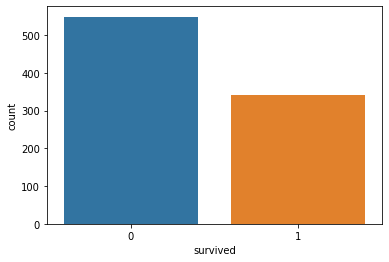

In [410]:
# Checking the data distribution for each class
sns.countplot(data=df_tr, x='survived');

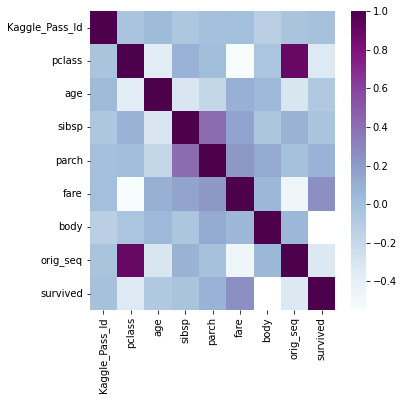

In [411]:
# Checking the data correlation between the variables
plt.figure(figsize=(5.5, 5.5))
sns.heatmap(df_tr.corr(), cmap="BuPu");

#### Conclusões parciais:

+ Observa-se inicialmente que a quantidade de pessoas que não sobreviveram (549), representado pelo número 0, é levemente maior que o número de pessoas que supreviveram (342), representado pelo número 1, logo é plausível de se considerar a realização de um dataset balacing para obter o mesmo número de amostras para cada caso.
+ Segunda observação é referente ao preenchimento de algumas colunas das tabelas, como por exemplo: Cabine (cabin), corpo (body) e barco (boat), possui uma alta porcentagem de valores faltantes, chegando em alguns casos a 90% de valores nulos, assim sendo, podemos considerar futuramente realizar o drop dessas colunas.
+ Terceira observação é em relação ao tipo de alguns dados, os quais não são valores numérios, mas sim categórico, o que pode vir a atrapalhar o resultado final.
+ Quarta e última observação vai para as colunas SibSp e Parch que representando acompanhantes dos donos dos tickets, a qual podemo realizar a junção e dividir entre sozinho ou acompanhado.

---

## # Second Stage -> Data cleaning and organizing:

Nesse estágio iremos então cuidar das observações 1, 2, 3 e 4. 
+ Logo, iremos inicialmente cuidar dos dados categóricos que acharmos relevantes. 
+ Em seguida juntaremos as colunas "SibSp" e "Parch" em uma chamada "alone" indicante se o dono do ticket está acompanhado ou não. 
+ Por fim ajustaremos a coluna de idade e removeremos as demais que são irrelevantes.

+ Tratando dos dados categóricos:

In [412]:
change = {
    'male': 0,
    'female': 1
}
df_tr.sex = df_tr.sex.map(change)
df_tt.sex = df_tt.sex.map(change)

In [413]:
change = {
    'Q': 0,
    'C': 1,
    'S': 2
}

df_tr.embarked = df_tr.embarked.map(change)
df_tt.embarked = df_tt.embarked.map(change)

+ Criando a coluna "alone"

In [414]:
# Primeiramente para o Dataset de treino:
# Se Alone > 0 -> Acompanhado = 0, se Alone == 0 -> Sozinho = 1
data = df_tr

data['relatives'] = data['sibsp'] + data['parch']

data.loc[data['relatives'] > 0, 'alone'] = 0
data.loc[data['relatives'] == 0, 'alone'] = 1

df_tr['alone'] = data['alone']
#------------------------------------------------------------#

# Para o Dataset de teste:
# Se Alone > 0 -> Acompanhado = 0, se Alone == 0 -> Sozinho = 1
data = df_tt

data['relatives'] = data['sibsp'] + data['parch']

data.loc[data['relatives'] > 0, 'alone'] = 0
data.loc[data['relatives'] == 0, 'alone'] = 1

df_tt['alone'] = data['alone']



+ Ajustando a coluna de idade

In [415]:
# Completnado as colunas vazias com a mediana das idades:

df_tr['age'] = df_tr['age'].fillna(df_tr['age'].median())
df_tt['age'] = df_tt['age'].fillna(df_tt['age'].median())

+ Ajustando a coluna de taxa (Fare)

In [416]:
df_tr['fare'] = df_tr['fare'].fillna(0)
df_tr['fare'] = df_tr['fare'].astype(int)

df_tt['fare'] = df_tt['fare'].fillna(0)
df_tt['fare'] = df_tt['fare'].astype(int)

+ Ajustando a coluna dos embarques

In [417]:
df_tr['embarked'] = df_tr['embarked'].fillna(df_tr['embarked'].median())
df_tt['embarked'] = df_tt['embarked'].fillna(df_tt['embarked'].median())


+ Ajustando as demais colunas do teste:

In [418]:
df_tt['alone'] = df_tt['alone'].fillna(df_tt['alone'].median())
df_tt['pclass'] = df_tt['pclass'].fillna(df_tt['pclass'].median())
df_tt['sex'] = df_tt['sex'].fillna(df_tt['sex'].median())

In [419]:
df_tr.head()

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq,survived,relatives,alone
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,2.0,NaN,NaN,"Bridgerule, Devon",690,0,1,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1.0,4,NaN,"New York, NY",86,1,1,0.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,2.0,NaN,NaN,NaN,861,1,0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,2.0,D,NaN,"Scituate, MA",128,1,1,0.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,2.0,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619,0,0,1.0


Para melhor visualização, temos:

C:\Users\thiag\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\thiag\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\thiag\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

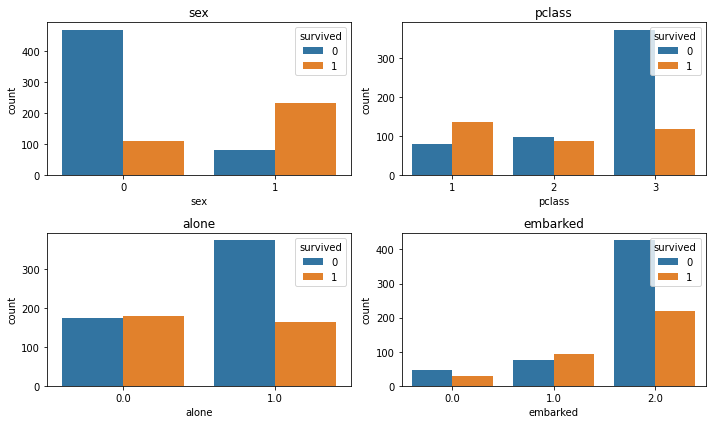

In [420]:
# Visualize the count of survivors for columns 'sex', 'pclass', 'alone' = ['sibsp', 'parch'], and 'embarked'
cols = ['sex', 'pclass', 'alone', 'embarked']

n_rows = 2
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*3))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(df_tr[cols[i]], hue=df_tr["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

Por fim, iremos remover (drop) algumas colunas que não foram consideradas relevantes para o resultado final:

In [421]:
df_tr.drop(['cabin','name','sibsp','parch','ticket','Kaggle_Pass_Id','boat','body','home.dest','orig_seq','relatives'], axis=1, inplace=True)
df_tt.drop(['cabin','name','sibsp','parch','ticket','Kaggle_Pass_Id','boat','body','home.dest','orig_seq','relatives'], axis=1, inplace=True)


In [422]:
cols = list(df_tr.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('survived')) #Remove b from list
df_tr = df_tr[cols+['survived']] #Create new dataframe with columns in the order you want

df_tr.head()

,pclass,sex,age,fare,embarked,alone,survived
0,3,0,22.0,7,2.0,0.0,0
1,1,1,38.0,71,1.0,0.0,1
2,3,1,26.0,7,2.0,1.0,1
3,1,1,35.0,53,2.0,0.0,1
4,3,0,35.0,8,2.0,1.0,0


In [423]:
df_tt.head()

,pclass,sex,age,fare,embarked,alone
0,3.0,0.0,34.5,7,0.0,1.0
1,3.0,1.0,47.0,7,2.0,0.0
2,2.0,0.0,62.0,9,0.0,1.0
3,3.0,0.0,27.0,8,2.0,1.0
4,3.0,1.0,22.0,12,2.0,0.0


In [424]:
df_tr.describe()

,pclass,sex,age,fare,embarked,alone,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361579,31.785634,1.638608,0.602694,0.383838
std,0.836071,0.477990,13.019705,49.703730,0.635673,0.489615,0.486592
min,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,14.000000,2.000000,1.000000,0.000000
75%,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,512.000000,2.000000,1.000000,1.000000


---

## # Third Stage -> Dataset Balacing:

Nesse terceiro estágio iremos realizar o balanceamento dos dados --> Isto é, o ajuste para ter o mesmo número de amostras dos targets.

In [425]:
# Splitting features and labels (targets)
y = df_tr['survived']
x = df_tr.drop('survived', axis=1)

In [426]:
# Checking the new dataframes.
x.shape, y.shape

((891, 6), (891,))

In [427]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [428]:
x.head()

,pclass,sex,age,fare,embarked,alone
0,3,0,22.0,7,2.0,0.0
1,1,1,38.0,71,1.0,0.0
2,3,1,26.0,7,2.0,1.0
3,1,1,35.0,53,2.0,0.0
4,3,0,35.0,8,2.0,1.0


---

Inicialmente utilizaremos a técnica de undersampling, a qual consiste selecionar randomicamente algumas amostras do dataser maior, de tal forma que no fim ele possui o mesmo tamanho do menor dataset.

In [429]:
# Using undersampling strategy
under = RandomUnderSampler()
x_under, y_under = under.fit_resample(x, y)

In [430]:
# Checking the labels
print(y_under)
sum(y_under), len(y_under)

0      0
1      0
2      0
3      0
4      0
      ..
679    1
680    1
681    1
682    1
683    1
Name: survived, Length: 684, dtype: int64


(342, 684)

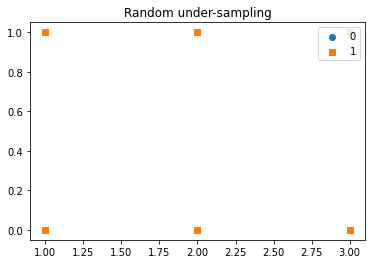

In [431]:
def plot_2d_space(X, y, label='survived'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

plot_2d_space(x_under.to_numpy(), y_under.to_numpy(), 'Random under-sampling')

In [432]:
# Creating a new dataframe on Pandas
df_under = pd.DataFrame(x_under, columns=x.columns)
df_under['survived'] = y_under
df_under.head()

,pclass,sex,age,fare,embarked,alone,survived
0,3,0,28.0,7,2.0,1.0,0
1,3,0,28.0,7,0.0,0.0,0
2,3,0,19.0,7,2.0,1.0,0
3,2,0,19.0,10,2.0,1.0,0
4,3,1,28.0,8,2.0,1.0,0


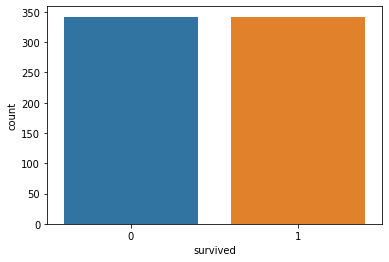

In [433]:
# Checking the target class
sns.countplot(data=df_under, x='survived');

In [434]:
# Checking the data
df_under.describe()

,pclass,sex,age,fare,embarked,alone,survived
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.250000,0.413743,28.865010,34.413743,1.612573,0.570175,0.500000
std,0.850674,0.492864,12.898726,52.843396,0.656460,0.495413,0.500366
min,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,7.750000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,15.000000,2.000000,1.000000,0.500000
75%,3.000000,1.000000,35.000000,35.000000,2.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,512.000000,2.000000,1.000000,1.000000


C:\Users\thiag\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


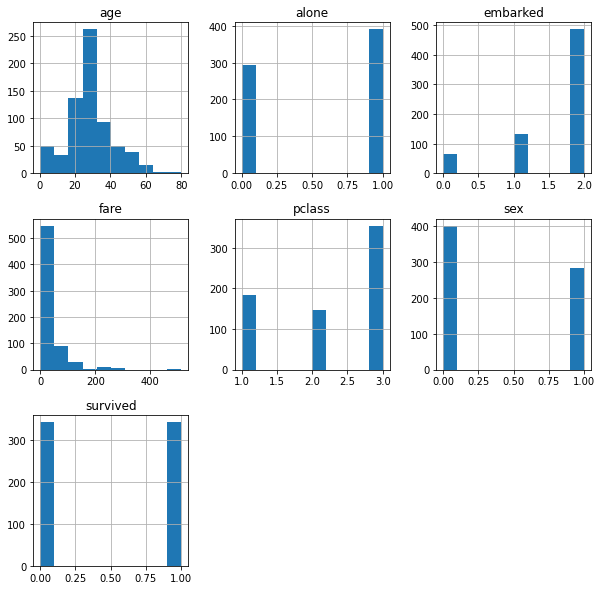

In [435]:
# Checking the dataset
df_under.hist(figsize = (10, 10))
plt.show()

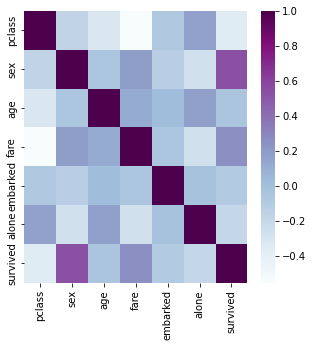

In [436]:
# Checking the data correlation between the variables
plt.figure(figsize=(5, 5))
sns.heatmap(df_under.corr(), cmap="BuPu");

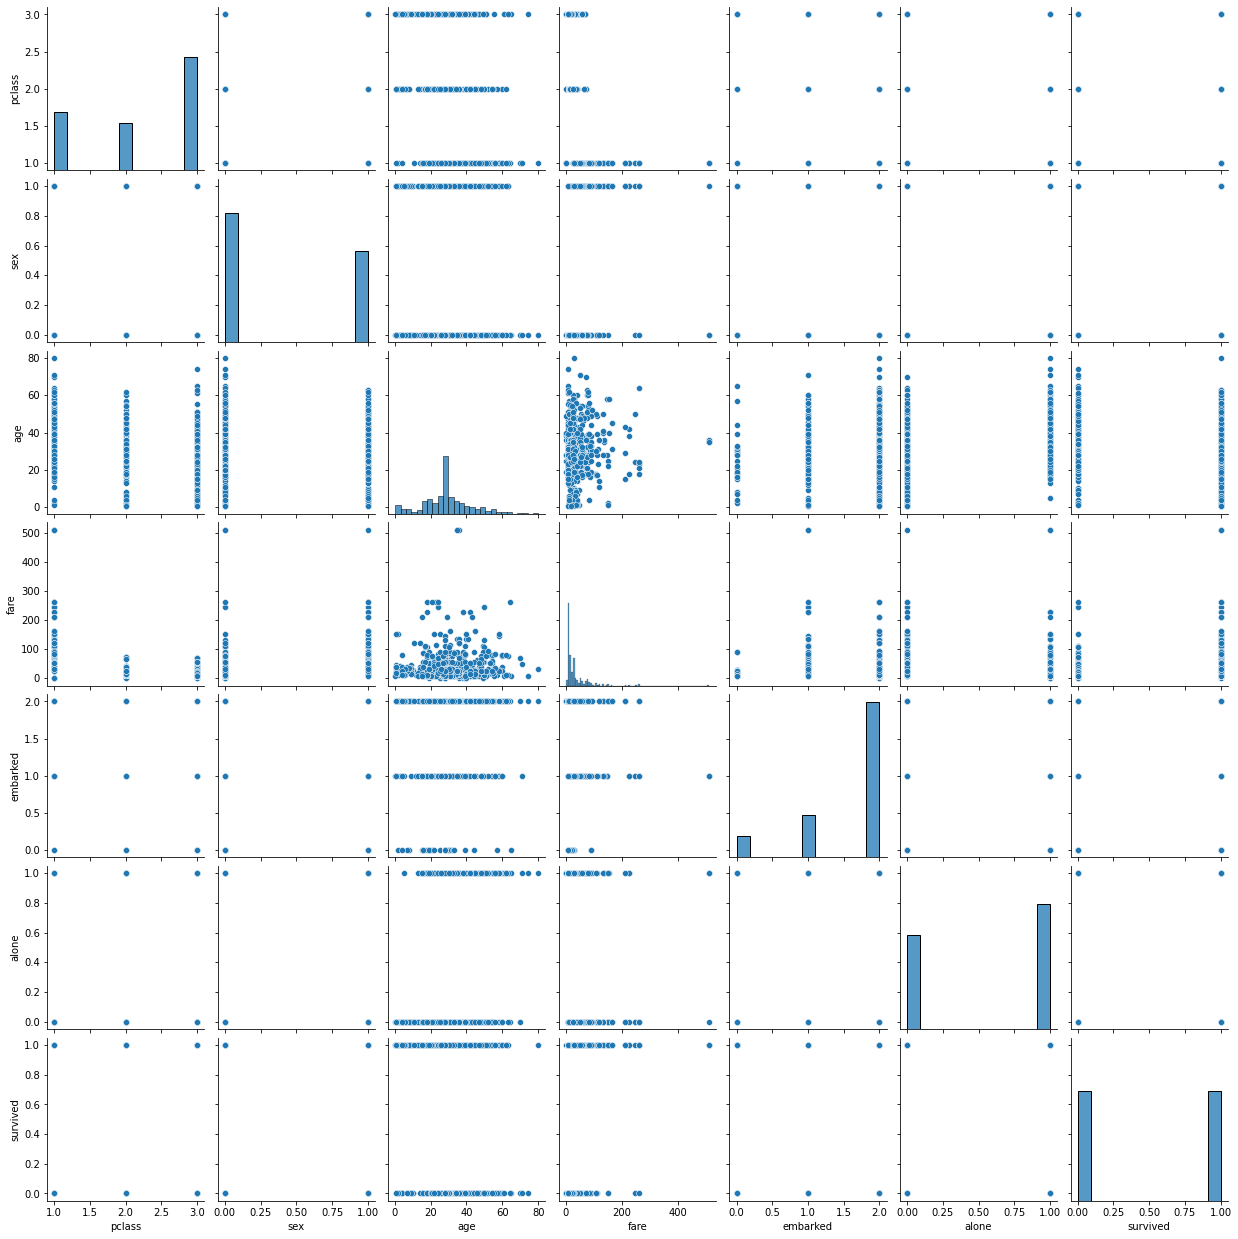

In [437]:
# Checking the data distribution
colss = ['pclass', 'sex', 'age', 'fare', 'embarked', 'alone', 'survived']
sns.pairplot(df_under[colss])
plt.show();

---

## # Fourth Stage [Optional] -> Model training:

In [438]:
# df_under -> Train dataset
# df_tt -> Test dataset
#-----------------------------------------#

# Checking the rows and columns of each dataset:
print("Shape of train: ", df_under.shape)
print("Shape of test: ", df_tt.shape)

Shape of train:  (684, 7)
Shape of test:  (419, 6)


Separando em Train and Test

In [439]:
x_train = df_under.drop("survived", axis=1)
y_train = df_under["survived"]

x_test  = df_tt

Normalizando os dados de entrada:

In [440]:
# Normalizing the input data
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)

[[0.88 -0.84 -0.07 -0.52 0.59 0.87]
 [0.88 -0.84 -0.07 -0.52 -2.46 -1.15]
 [0.88 -0.84 -0.77 -0.52 0.59 0.87]
 ...
 [-0.29 1.19 -0.30 -0.16 0.59 -1.15]
 [-1.47 1.19 -0.77 -0.08 0.59 0.87]
 [-1.47 -0.84 -0.22 -0.08 -0.93 0.87]]


### Function to validate the training:

In [441]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

def plot_ROC(clf, X_test, y_test):
    metrics.plot_roc_curve(clf, X_test, y_test)  
    plt.show()  

# Generating the score summary
def evaluate_model(proba, y_test, y_pred):
    s1 = accuracy_score(y_test, y_pred).round(3)
    s2 = precision_score(y_test, y_pred, average='weighted').round(3)
    s3 = recall_score(y_test, y_pred, average='weighted').round(3)
    s4 = f1_score(y_test, y_pred, average='weighted').round(3)
    s5 = roc_auc_score(y_test, proba, average='weighted').round(3)
    print("Accuracy ", s1)
    print("Precision ", s2)
    print("Recall ", s3)
    print("f1 score ", s4)
    print("ROC_AUC ", s5)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)


### Using Logistic Regression:

In [442]:
import statsmodels.api as sm

x = sm.add_constant(x_train)
reg_log = sm.Logit(y_train, x_train)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.473397
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  684
Model:                          Logit   Df Residuals:                      678
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Jan 2022   Pseudo R-squ.:                  0.3170
Time:                        20:41:18   Log-Likelihood:                -323.80
converged:                       True   LL-Null:                       -474.11
Covariance Type:            nonrobust   LLR p-value:                 7.374e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9250      0.128     -7.255      0.000      -1.175      -0.675
x2             1.2412      0.105     11.833      0.000       1.036       1.447
x3            -0.3972      0.109     -3.653      0.000      -0.610      -0.184
x4             0.0992      0.139      0.716      0.474      -0.172       0.371
x5            -0.1506      0.097     -1.552      0.121      -0.341       0.040
x6             0.0647      0.107      0.603      0.547      -0.146       0.275
==============================================================================
"""

### Conclusões parciais:

-> Podemos concluir dessa tabela que as variáveis onde o P-value ou P>|z| é maior que 0.05 são pouco relevantes, logo, poderíamos remover as colunas 4 e 6.

-> Além disso, que o Pseudo R-squared está boa, visto que está entre 0.2 e 0.4 -> "Good —> 0.2 e 0.4 - 365 DataScience - MachineLearning Course".

-> O Log-Likelihood está levemente baixo, provavelmente devido a algumas variáveis pouco relevantes.

In [443]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
#np.set_printoptions(formatter=None)
results_log.predict(x_test)

array([0.16, 0.47, 0.20, 0.13, 0.66, 0.19, 0.73, 0.30, 0.76, 0.14, 0.13,
       0.44, 0.95, 0.12, 0.90, 0.88, 0.36, 0.19, 0.62, 0.58, 0.41, 0.19,
       0.95, 0.66, 0.94, 0.06, 0.96, 0.18, 0.48, 0.15, 0.17, 0.31, 0.58,
       0.63, 0.60, 0.20, 0.65, 0.69, 0.14, 0.14, 0.10, 0.58, 0.09, 0.84,
       0.90, 0.14, 0.50, 0.19, 0.90, 0.56, 0.59, 0.37, 0.86, 0.96, 0.37,
       0.27, 0.11, 0.14, 0.12, 0.96, 0.17, 0.28, 0.17, 0.78, 0.79, 0.85,
       0.80, 0.44, 0.61, 0.90, 0.77, 0.15, 0.64, 0.63, 0.96, 0.68, 0.13,
       0.86, 0.29, 0.77, 0.25, 0.34, 0.41, 0.13, 0.42, 0.15, 0.75, 0.71,
       0.75, 0.47, 0.66, 0.13, 0.94, 0.13, 0.65, 0.14, 0.79, 0.12, 0.70,
       0.11, 0.92, 0.29, 0.19, 0.14, 0.75, 0.13, 0.22, 0.19, 0.13, 0.37,
       0.27, 0.75, 0.94, 0.80, 0.88, 0.18, 0.16, 0.79, 0.59, 0.83, 0.90,
       0.17, 0.94, 0.13, 0.19, 0.70, 0.15, 0.73, 0.22, 0.14, 0.12, 0.44,
       0.63, 0.14, 0.08, 0.14, 0.16, 0.32, 0.68, 0.09, 0.75, 0.95, 0.46,
       0.31, 0.47, 0.11, 0.59, 0.15, 0.58, 0.27, 0.

Apenas por questões de brincadeira, utilizaremos um classificar Dummy para chutar as "verdadeiras" saídas do dataset de teste.

In [444]:
results_log.pred_table()

array([[270.00, 72.00],
       [80.00, 262.00]])

In [445]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,270.0,72.0
Actual 1,80.0,262.0


In [446]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()*100

print("Acurácia de: %.2f" % accuracy_train + "%")

Acurácia de: 77.78%


---

### Por random forest:

In [447]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)


In [448]:
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [449]:
print("Acurácia de: %.2f" % acc_random_forest + "%")

Acurácia de: 96.20%
